# 0. Setup environment

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
import os
from torch import nn
from torchvision import transforms
import numpy as np
import shutil

# try:
#     from torchinfo import summary
# except:
#     print("[INFO] Couldn't find torchinfo... installing it.")
#     !pip install -q torchinfo
#     from torchinfo import summary

In [2]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 1. HCMC AI Challenge 2023 dataset

In [5]:
# Copy data from drive
shutil.copy('drive/MyDrive/AI_Challenge/keyframes.zip', 'keyframes.zip')

'keyframes.zip'

In [ ]:
# Copy data from drive
shutil.copy('drive/MyDrive/AI_Challenge/objects_02.zip', 'objects_02.zip')

'objects_02.zip'

In [6]:
import zipfile
with zipfile.ZipFile('keyframes.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import zipfile
# # if not os.path.exists('obj_det'):
# #     os.mkdir("obj_det")
with zipfile.ZipFile('objects_02.zip', 'r') as zip_ref:
    zip_ref.extractall('drive/MyDrive/AI_Challenge/infer_result/obj_det')

In [7]:
os.remove('keyframes.zip')
# os.remove('objects_02.zip')

In [5]:
# define data set path
DATA_PATH = '.'

# 2. Export trained YOLO v8

In [ ]:
!pip install ultralytics

In [ ]:
!pip install fiftyone

In [ ]:
!pip install fiftyone-db-ubuntu2204

In [ ]:
from ultralytics.utils import LOGGER, SETTINGS, Path, is_ubuntu, get_ubuntu_version
from ultralytics.utils.checks import check_requirements, check_version

check_requirements('fiftyone')
if is_ubuntu() and check_version(get_ubuntu_version(), '>=22.04'):
    # Ubuntu>=22.04 patch https://github.com/voxel51/fiftyone/issues/2961#issuecomment-1666519347
    check_requirements('fiftyone-db-ubuntu2204')

import fiftyone as fo
import fiftyone.zoo as foz
import warnings

name = 'open-images-v7'
fraction = 0.1  # fraction of full dataset to use
LOGGER.warning('WARNING ⚠️ Open Images V7 dataset requires at least **561 GB of free space. Starting download...')
for split in 'train', 'validation':  # 1743042 train, 41620 val images
    train = split == 'train'

    # Load Open Images dataset
    dataset = foz.load_zoo_dataset(name,
                                    split=split,
                                    label_types=['detections'],
                                    dataset_dir=Path(SETTINGS['datasets_dir']) / 'fiftyone' / name,
                                    max_samples=round((1743042 if train else 41620) * fraction))

    # Define classes
    if train:
        classes = dataset.default_classes  # all classes
        # classes = dataset.distinct('ground_truth.detections.label')  # only observed classes

    # Export to YOLO format
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="fiftyone.utils.yolo")
        dataset.export(export_dir=str(Path(SETTINGS['datasets_dir']) / name),
                        dataset_type=fo.types.YOLOv5Dataset,
                        label_field='ground_truth',
                        split='val' if split == 'validation' else split,
                        classes=classes,
                         overwrite=train)

In [ ]:
!rm -r datasets/fiftyone
import shutil
shutil.make_archive('open_images_v7_10', 'zip', 'datasets')
!rm -r datasets
!mv open_images_v7_10.zip drive/MyDrive/YOLOv8Training

In [ ]:
import shutil
shutil.copy('drive/MyDrive/YOLOv8Training/open_images_v7_10.zip', 'open_images_v7_10.zip')
os.mkdir('datasets')

In [ ]:
import zipfile
with zipfile.ZipFile('open_images_v7_10.zip', 'r') as zip_ref:
    zip_ref.extractall('datasets')

In [ ]:
shutil.copy('drive/MyDrive/YOLOv8/yolov8m.pt', 'yolov8m.pt')

'yolov8m.pt'

In [ ]:
from ultralytics import YOLO

# Load a model
model =  YOLO('yolov8m.yaml').load('drive/MyDrive/YOLOv8Training/open_images_v7_10/train2/weights/last.pt')  # load a pretrained model (recommended for training)

# Use the model
model.train(
    data="open-images-v7.yaml",
    epochs=1, batch=-1, save_period=1,
    cache=True, resume=True, project='drive/MyDrive/YOLOv8Training/open_images_v7_10',
    val=False, workers=4, seed=622
)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
# results = model("https://ultralytics.com/images/bus.jpg", save=True)  # predict on an image


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

FailedPreconditionError: ignored

In [ ]:
from ultralytics import YOLO

# Load a model
model =  YOLO('yolov8m.yaml').load('drive/MyDrive/YOLOv8Training/open_images_v7_10/train2/weights/last.pt')  # load a pretrained model (recommended for training)

# Use the model
model.train(
    data="open-images-v7.yaml",
    epochs=1, batch=-1, save_period=1,
    cache=True, resume=True, project='drive/MyDrive/YOLOv8Training/open_images_v7_10',
    val=False, workers=4, seed=622
)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
# results = model("https://ultralytics.com/images/bus.jpg", save=True)  # predict on an image


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!cp runs/detect/train/weights/best.pt drive/MyDrive/YOLOv8/YOLOv8m_OpenImagesv7_1.pt

# 3. Detect objects

In [ ]:
# !pip install ultralytics
from ultralytics import YOLO

In [ ]:
checkpoint='YOLOv8m_OpenImagesv7_1.pt'
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!cp drive/MyDrive/YOLOv8/$checkpoint $checkpoint

In [ ]:
model =  YOLO(checkpoint)

In [ ]:
import json
import os
result_path = 'obj_det'
if not os.path.exists(result_path):
    os.mkdir(result_path)
json_path = os.path.join(result_path, 'obj_det.json')
init = not os.path.exists(json_path)
for i, video in enumerate(os.listdir(DATA_PATH)):
    if not video.startswith('Keyframes'):
        continue
    video_path = os.path.join(DATA_PATH, video)
    for scene in os.listdir(video_path):
        if scene.endswith('.mp4') or not scene.startswith('L'):
            continue
        scene_path = os.path.join(video_path, scene)
        results = model(os.path.join(scene_path, '*.jpg'))
        for res in results:
            # json_path = os.path.join(result_path, res.path[-30:-4] + '.json')
            # origin_shape = torch.tensor(list(res.boxes.orig_shape)).repeat(res.boxes.xyxy.shape[0],2)
            res_dict = {
                'detection_class_labels': res.boxes.cls.tolist(),
                'detection_scores': res.boxes.conf.tolist(),
                'detection_boxes': res.boxes.xyxy.tolist(),
                'detection_class_entity': [res.names[label] for label in res.boxes.cls.tolist()],
                'segmentation_mask': [],
                'objects_color': []
            }

            if init:
                results_dict = {res.path[-30:]: res_dict}
                init = False
            else:
                with open(json_path, 'r') as of:
                    results_dict = json.load(of)
                    results_dict[res.path[-30:]] = res_dict

            with open(json_path, 'w') as of:
                json_object = json.dumps(results_dict, indent=4)
                of.write(json_object)

        break
    break


image 1/283 /content/Keyframes_01/L01_V017/0001.jpg: 384x640 (no detections), 26.3ms
image 2/283 /content/Keyframes_01/L01_V017/0002.jpg: 384x640 1 Clothing, 1 Person, 26.3ms
image 3/283 /content/Keyframes_01/L01_V017/0003.jpg: 384x640 1 Clothing, 2 Persons, 1 Tower, 26.2ms
image 4/283 /content/Keyframes_01/L01_V017/0004.jpg: 384x640 1 Man, 26.3ms
image 5/283 /content/Keyframes_01/L01_V017/0005.jpg: 384x640 (no detections), 26.4ms
image 6/283 /content/Keyframes_01/L01_V017/0006.jpg: 384x640 1 Car, 1 Land vehicle, 26.5ms
image 7/283 /content/Keyframes_01/L01_V017/0007.jpg: 384x640 1 Car, 2 Mans, 26.6ms
image 8/283 /content/Keyframes_01/L01_V017/0008.jpg: 384x640 (no detections), 17.8ms
image 9/283 /content/Keyframes_01/L01_V017/0009.jpg: 384x640 (no detections), 17.8ms
image 10/283 /content/Keyframes_01/L01_V017/0010.jpg: 384x640 (no detections), 17.8ms
image 11/283 /content/Keyframes_01/L01_V017/0011.jpg: 384x640 2 Human faces, 1 Office building, 3 Persons, 17.3ms
image 12/283 /conten

In [ ]:
test[0].path[24:-4]

'Videos_L06/L06_V010/000000'

# 4. Segmentation mask using SAM

In [1]:
# !pip install opencv-python pycocotools matplotlib onnxruntime onnx git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python pycocotools matplotlib onnxruntime onnx timm git+https://github.com/ChaoningZhang/MobileSAM.git

  Cloning https://github.com/ChaoningZhang/MobileSAM.git to /tmp/pip-req-build-uf0k60yl
  Running command git clone --filter=blob:none --quiet https://github.com/ChaoningZhang/MobileSAM.git /tmp/pip-req-build-uf0k60yl
  Resolved https://github.com/ChaoningZhang/MobileSAM.git to commit 01ea8d0f5590082f0c1ceb0a3e2272593f20154b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.8 MB/s eta 0:00:00
  Created wheel for mobile-sam: filename=mobile_sam-1.0-py3-none-any.whl

In [2]:
# !cp drive/MyDrive/SAM/sam_vit_h_4b8939.pth sam_vit_h_4b8939.pth
!wget https://raw.githubusercontent.com/ChaoningZhang/MobileSAM/master/weights/mobile_sam.pt

--2023-09-19 00:20:47--  https://raw.githubusercontent.com/ChaoningZhang/MobileSAM/master/weights/mobile_sam.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40728226 (39M) [application/octet-stream]
Saving to: ‘mobile_sam.pt’

mobile_sam.pt       100%[===================>]  38.84M  58.9MB/s    in 0.7s    

2023-09-19 00:20:50 (58.9 MB/s) - ‘mobile_sam.pt’ saved [40728226/40728226]



In [6]:
# define SAM predictor
# from segment_anything import SamPredictor, sam_model_registry
from mobile_sam import sam_model_registry, SamPredictor

# sam_checkpoint = "sam_vit_h_4b8939.pth"
# model_type = "vit_h"

sam_checkpoint = "mobile_sam.pt"
model_type = "vit_t"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

Sam(
  (image_encoder): TinyViT(
    (patch_embed): PatchEmbed(
      (seq): Sequential(
        (0): Conv2d_BN(
          (c): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): GELU(approximate='none')
        (2): Conv2d_BN(
          (c): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
    )
    (layers): ModuleList(
      (0): ConvLayer(
        (blocks): ModuleList(
          (0-1): 2 x MBConv(
            (conv1): Conv2d_BN(
              (c): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
            (act1): GELU(approximate='none')
            (conv2): Conv2d_BN(
 

In [7]:
# function to read data from json file

from mobile_sam.utils.transforms import ResizeLongestSide
from torch.utils.data import Dataset
import cv2
import json
import numpy as np

resize = ResizeLongestSide(sam.image_encoder.img_size)
to_tensor = transforms.Compose([transforms.ToTensor()])

def prepare_image(image, resize=resize):
    image = resize.apply_image(image)
    image = torch.as_tensor(image)
    return image.permute(2, 0, 1).contiguous()

def prepare_boxes(boxes, img_size, resize=resize):
    # print(boxes)
    # print(to_tensor(boxes))
    h, w = img_size
    for box in boxes:
        box[0] = w*box[0]
        box[1] = h*box[1]
        box[2] = w*box[2]
        box[3] = h*box[3]
    return resize.apply_boxes_torch(torch.as_tensor(boxes), img_size)


In [8]:
from torchvision import datasets
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class SAMDataset(Dataset):
    def __init__(
        self,
        json_path,
        img_base_path,
        checkpoint_path,
        img_transform=prepare_image,
        boxes_transform=prepare_boxes,
    ):
        with open(json_path, 'r') as of:
            data_dict = json.load(of)
        with open(checkpoint_path, 'r') as of:
            retrieved_path = json.load(of)['retrieved_path']
        self.data = [(path, data_dict[path]['detection_boxes']) \
                     for path in data_dict \
                     if len(data_dict[path]['detection_boxes'])!=0\
                     and path not in retrieved_path]
        self.img_base_path = img_base_path
        self.img_transform = img_transform
        self.boxes_transform = boxes_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx][0]
        img = cv2.imread(os.path.join(self.img_base_path, img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        boxes = self.data[idx][1]
        num_obj = len(boxes)
        ext_hsv_img = torch.as_tensor(cv2.cvtColor(img, cv2.COLOR_BGR2HSV)).unsqueeze(0).expand(num_obj,-1,-1,-1).permute(0, 3, 1, 2).contiguous()
        res = {
            'image': self.img_transform(img),
            'boxes': self.boxes_transform(boxes, img.shape[:2]),
            'original_size': img.shape[:2]
        }
        return res, img_path, num_obj, ext_hsv_img

def SAM_collate_fn(data):
    res, path, num_obj, hsv = zip(*data)
    return res, [path, num_obj], torch.cat(hsv, dim=0)

def input_to_device(data, device):
    for batch_dict in data:
        batch_dict['image'] = batch_dict['image'].to(device)
        batch_dict['boxes'] = batch_dict['boxes'].to(device)
    return data

In [14]:
def to_tensor(h,s,v):
    return torch.tensor([[[h]], [[s]], [[v]]])

HSV_COLOR_TORCH = {
    'black': [
        (to_tensor(0,0,0), to_tensor(180, 255, 25))
    ],
    'white': [
        (to_tensor(0,0,166), to_tensor(180,38,255))
    ],
    'gray': [
        (to_tensor(0,0,26),to_tensor(180,38,165))
    ],
    'red': [
        (to_tensor(0,179,26), to_tensor(5,255,255)),
        (to_tensor(176,179,26),to_tensor(180,255,255))
    ],
    'pink': [
        (to_tensor(0,39,26), to_tensor(5,178,255)),
        (to_tensor(176,39,26), to_tensor(180,178,255)),
        (to_tensor(156,39,26), to_tensor(176,255,255))
    ],
    'orange': [
        (to_tensor(6,39,192), to_tensor(22,255,255))
    ],
    'brown': [
        (to_tensor(6,39,26), to_tensor(23,255,191))
    ],
    'yellow': [
        (to_tensor(23,39,26), to_tensor(32,255,255))
    ],
    'green': [
        (to_tensor(33,39,26), to_tensor(75,255,255))
    ],
    'blue-green': [
        (to_tensor(76,39,26), to_tensor(90,255,255))
    ],
    'blue': [
        (to_tensor(91,39,26), to_tensor(127,255,255))
    ],
    'purple': [
        (to_tensor(128,128,26), to_tensor(155,255,255))
    ],
    'light-purple': [
        (to_tensor(128,39,26), to_tensor(155,127,255))
    ]
}

In [15]:
import logging
import shutil

def log_str(log_path, msg, logger_name='my_logger'):
    logger = logging.getLogger(logger_name)
    logger.setLevel(logging.DEBUG)
    file_handler = logging.FileHandler(log_path, mode='a', encoding='utf-8')
    file_handler.setLevel(logging.DEBUG)
    file_handler.setFormatter(logging.Formatter('%(asctime)s: %(message)s'))
    logger.addHandler(file_handler)
    logger.debug(msg)
    logger.removeHandler(file_handler)
    file_handler.close()

def color_detection(img_paths, batched_output, hsv_images, paths, threshold=0.05, color_pallete=HSV_COLOR_TORCH):
    json_path, checkpoint_path, log_path = paths
    color_result = [[{} for j in range(img_paths[1][i])]  for i in range(len(img_paths[1]))]
    log_str(log_path, f'Start color detection', logger_name='Processed_logger')
    with open(json_path, 'r') as of:
        results_dict = json.load(of)
    if os.path.exists(f'{json_path[:-5]}_backup.json'):
        os.remove(f'{json_path[:-5]}_backup.json')
    shutil.copy(json_path, f'{json_path[:-5]}_backup.json')

    for color in color_pallete:
        for color_range in color_pallete[color]:
          color_masks = torch.where((hsv_images >= color_range[0].expand(hsv_images.size()).to(hsv_images.device)) &
                                    (hsv_images <= color_range[1].expand(hsv_images.size()).to(hsv_images.device)) &
                                    batched_output.expand(-1,3,-1,-1), 255.0, 0.0)
          color_masks = torch.where(color_masks.mean(dim=1, keepdim=True) == 255, True, False)
          color_ratios = (torch.sum(color_masks, dim=(3,2))/torch.sum(batched_output, dim=(3,2))).squeeze(dim=1).tolist()

          id_range = [0] + [sum(img_paths[1][:i+1]) for i in range(len(img_paths[1]))]
          cur_id = 0
          for i in range(len(color_ratios)):
              if i >= id_range[cur_id+1]:
                  cur_id += 1
              if color_ratios[i] < threshold:
                  continue
              if color not in color_result[cur_id][i-id_range[cur_id]]:
                  color_result[cur_id][i-id_range[cur_id]][color] = color_ratios[i]
              else:
                  color_result[cur_id][i-id_range[cur_id]][color] += color_ratios[i]


    for i, path in enumerate(img_paths[0][:]):
        results_dict[path]['object_colors'] = color_result[i]
        results_dict[path]['object_ratios'] = []
    with open(json_path, 'w') as of:
        json_object = json.dumps(results_dict, indent=4)
        of.write(json_object)

    with open(checkpoint_path, 'r') as of:
        checkpoint = json.load(of)
    if os.path.exists(f'{checkpoint_path[:-5]}_backup.json'):
        os.remove(f'{checkpoint_path[:-5]}_backup.json')
    shutil.copy(checkpoint_path, f'{checkpoint_path[:-5]}_backup.json')
    with open(checkpoint_path, 'w') as of:
        checkpoint['retrieved_path'].extend(img_paths[0][:])
        json_object = json.dumps(checkpoint, indent=4)
        of.write(json_object)

    log_str(log_path, f'Done color detection', logger_name='Processed_logger')

In [16]:
def init_paths(det_json_path = 'obj_det/obj_det.json',
              seg_json_path = 'obj_color_seg/obj_color_seg.json',
              checkpoint_path = 'checkpoint/checkpoint.json',
              log_path = 'color_detection_log/processes.log'):

    with open(det_json_path, 'r') as of:
        results_dict = json.load(of)

    if not os.path.exists(seg_json_path):
        with open(seg_json_path, 'w') as of:
            json_object = json.dumps(results_dict, indent=4)
            of.write(json_object)

    if not os.path.exists(checkpoint_path):
        with open(checkpoint_path, 'w') as of:
            json_object = json.dumps({'retrieved_path': []}, indent=4)
            of.write(json_object)

    if not os.path.exists(log_path):
        logger = logging.getLogger('processes_logger')
        logger.setLevel(logging.DEBUG)

        file_handler = logging.FileHandler(log_path, mode='w', encoding='utf-8')
        file_handler.setLevel(logging.DEBUG)
        file_handler.setFormatter(logging.Formatter('%(asctime)s %(message)s'))
        logger.addHandler(file_handler)
        logger.debug('This is multiprocesses color detection log')
        logger.removeHandler(file_handler)
        file_handler.close()

    return (seg_json_path, checkpoint_path, log_path)

In [17]:
from tqdm import tqdm
import copy

def segment_color_infer(index=0, batch_size=16,
                        det_json_path='drive/MyDrive/AI_Challenge/infer_result/obj_det/obj_det.json',
                        seg_json_path='drive/MyDrive/AI_Challenge/infer_result/obj_color_seg/obj_color_seg.json',
                        checkpoint_path='drive/MyDrive/AI_Challenge/infer_result/checkpoint/checkpoint.json',
                        log_path='drive/MyDrive/AI_Challenge/infer_result/color_detection_log/processes.log'):
    # initialize paths
    det_json_path = f'{det_json_path[:-5]}_{index}.json'
    seg_json_path = f'{seg_json_path[:-5]}_{index}.json'
    checkpoint_path = f'{checkpoint_path[:-5]}_{index}.json'
    log_path = f'{log_path[:-4]}_{index}.log'
    path_list = init_paths(det_json_path = det_json_path,
                          seg_json_path = seg_json_path,
                          checkpoint_path = checkpoint_path,
                          log_path = log_path)

    # load dataset
    sam_dataset = SAMDataset(
        det_json_path,
        DATA_PATH,
        checkpoint_path
    )
    sam_dataloader = DataLoader(
        sam_dataset,
        batch_size=batch_size,
        shuffle=False,
        drop_last=False,
        pin_memory=True,
        num_workers=4,
        collate_fn=SAM_collate_fn
    )

    # inference
    sam.eval()
    threads, results= list(), list()
    result = None
    num_processes = multiprocessing.cpu_count()  # Adjust as needed
    with Manager() as manager:
        with Pool(num_processes*3) as pool:
            shared_dict = manager.dict()
            lock = manager.Lock()
            with torch.inference_mode():
                for batch, (batched_input, img_paths, hsv_imgs) in enumerate(tqdm(sam_dataloader, desc="Segmenting: ")):
                    if batch != 0: break
                    print(f' Inferencing batch {batch}...')
                    batched_input = input_to_device(batched_input, device)
                    batched_output = torch.cat([
                        img['masks']
                        for img in sam(batched_input, multimask_output=False)
                    ], dim=0)
                    hsv_imgs = hsv_imgs.to(device)
                    color_detection(img_paths, batched_output, hsv_imgs, path_list)

In [18]:
segment_color_infer(index=1, batch_size=16)

DEBUG:processes_logger:This is multiprocesses color detection log
Segmenting:   0%|          | 0/2763 [00:00<?, ?it/s]

 Inferencing batch 0...


DEBUG:Processed_logger:Start color detection
DEBUG:Processed_logger:Done color detection
Segmenting:   0%|          | 1/2763 [01:29<68:38:59, 89.48s/it]


In [ ]:
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

Keyframes_01/L01_V017/0170.jpg
{'orange': 0.6773, 'brown': 0.3129}


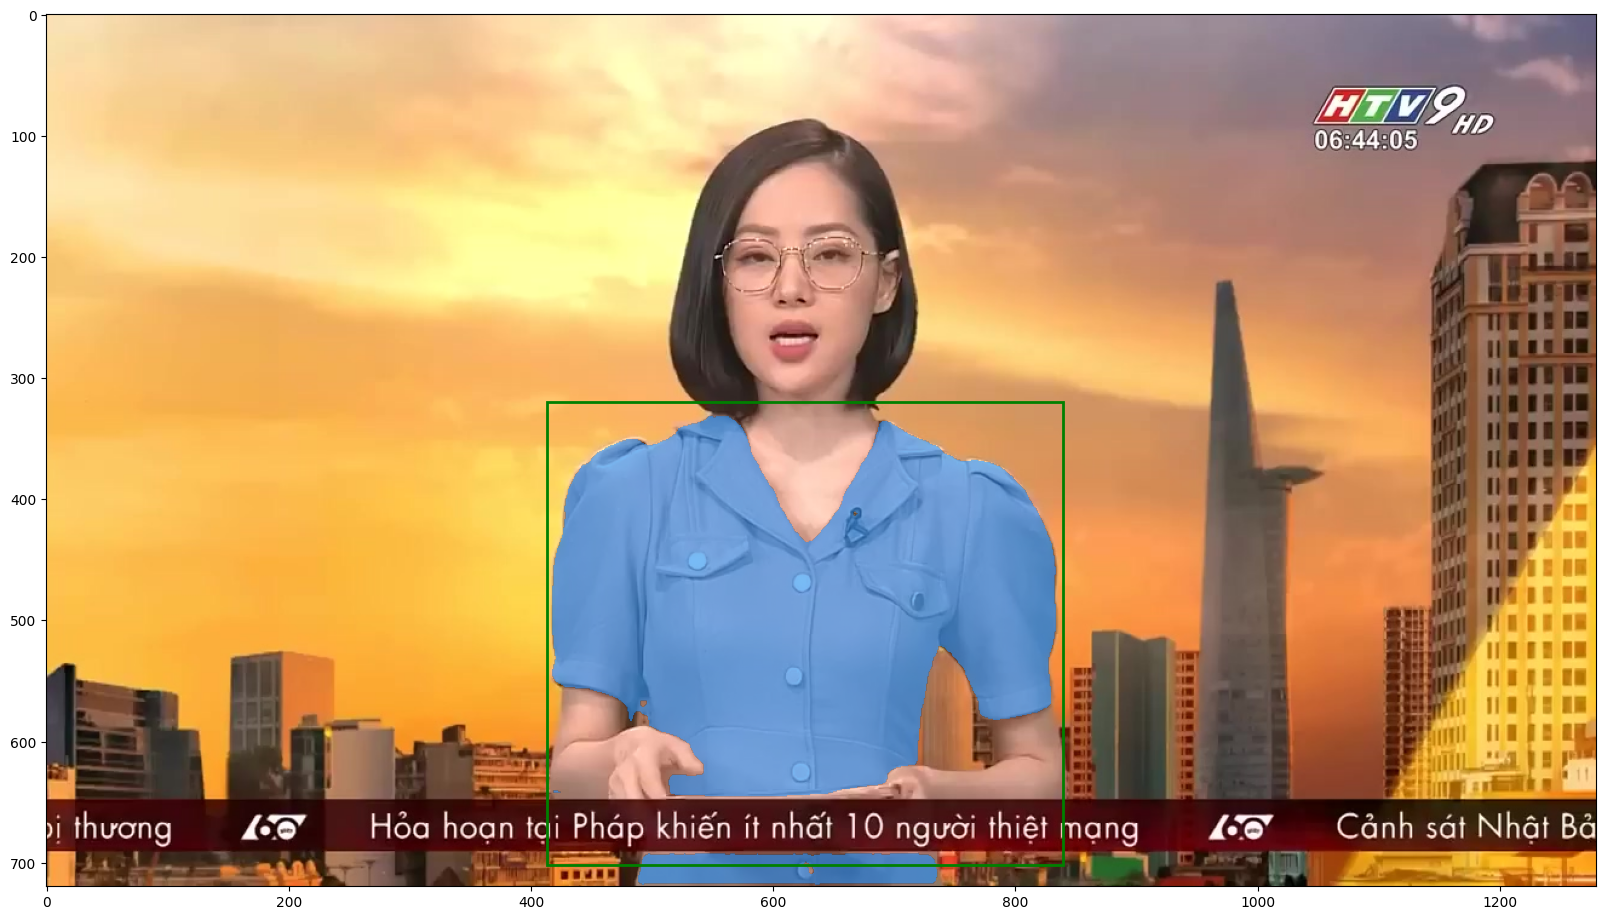

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

for i, img_path in enumerate(img_paths):
    if i!= 150:
        continue
    print(img_path)
    image = cv2.imread(os.path.join(DATA_PATH, img_path), cv2.IMREAD_COLOR)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    for j, mask in enumerate(batched_output[i]):
        if j!=3:
            continue
        show_mask(np.array(mask), ax, random_color=False)
        show_box(np.array(results_dict[img_path]['detection_boxes'][j]), ax)
        mask = np.squeeze(np.where(mask, 255, 0).astype(np.uint8))
        # color = color_checker(cv2.mean(hsv_image, mask=mask))
        color = color_checker(hsv_image, mask, 0.05)
        print(color)
        break
    break

# ax[1].axis('off')

# plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np

# load data from detection json
seg_json_path = 'obj_color_seg/obj_color_seg.json'
with open(det_json_path, 'r') as of:
    results_dict = json.load(of)

for i, img_path in enumerate(img_paths):
    image = cv2.imread(os.path.join(DATA_PATH, img_path), cv2.IMREAD_COLOR)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    objects_color = []
    for j, mask in enumerate(batched_output[i]):
        mask = np.squeeze(np.where(mask, 255, 0).astype(np.uint8))
        # color = color_checker(cv2.mean(hsv_image, mask=mask))
        color = color_checker(hsv_image, mask, 0.05)
        objects_color.append(color)
    # results_dict[img_path[-30:]]['segmentation_mask'] = batched_output[i]
    results_dict[img_path[-30:]]['object_colors'] = objects_color

if not os.path.exists('obj_color_seg'):
    os.mkdir('obj_color_seg')
with open(seg_json_path, 'w') as of:
    json_object = json.dumps(results_dict, indent=4)
    of.write(json_object)

In [ ]:
seg_json_path = 'obj_color_seg/obj_color_seg.json'
if not os.path.exists('obj_color_seg'):
    os.mkdir('obj_color_seg')

In [ ]:
import cv2
import numpy as np
import json

# load data from detection json
# seg_json_path = 'obj_color_seg/obj_color_seg.json'
seg_json_path = 'obj_det/obj_det.json'
obj_data_json_path = 'obj_data/obj_data.json'
with open(seg_json_path, 'r') as of:
    obj_dict = json.load(of)

results_dict = {}
for path in obj_dict:
    results_dict[path] = {}
    for i, obj in enumerate(obj_dict[path]['detection_class_entities']):
        obj_data = {
            'quantity': 1,
            'scores': [obj_dict[path]['detection_scores'][i]],
            'color': [obj_dict[path]['object_colors'][i] if i < len(obj_dict[path]['object_colors']) else {}]
        }
        if obj not in results_dict[path]:
            results_dict[path][obj] = obj_data
        else:
            results_dict[path][obj] = {key: results_dict[path][obj][key] + obj_data[key] for key in obj_data}

if not os.path.exists('obj_data'):
    os.mkdir('obj_data')
with open(obj_data_json_path, 'w') as of:
    json_object = json.dumps(results_dict, indent=4)
    of.write(json_object)

In [ ]:
with open(obj_data_json_path, 'r') as of:
    obj_dict = json.load(of)

In [ ]:
!cp obj_data/obj_data.json drive/MyDrive/AI_Challenge/obj_data.json

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [ ]:
gauth = GoogleAuth()
gauth.LocalWebserverAuth()  # This will open a new tab for authentication
drive = GoogleDrive(gauth)

InvalidConfigError: Invalid client secrets file Missing property "redirect_uris" in a client type of "web".